<a href="https://colab.research.google.com/github/Ipal23/Machine-learning-on-Survey-Data/blob/main/Australian_weather_survey_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Author Iliana Paliari

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import os
import glob
import math

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz


from IPython.display import display
from IPython.core.display import display, HTML


%matplotlib inline

from google.colab import files

uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['weatherAUS.csv']))

# To display the top 5 rows 
data.head(5)  


Saving weatherAUS.csv to weatherAUS.csv


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [3]:
data = data.rename(columns={'Date': 'Date'})
data = data.rename(columns={'MaxTemp': 'MaxTemp'})

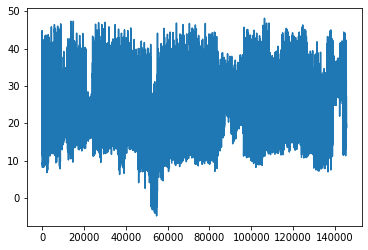

In [4]:
data.MaxTemp.plot.line()

In [5]:
print(len(data[data.MaxTemp > 30])) # 9

26800


In [6]:
# DATA CLEANING

reject_cols = ['Date', 'Location', 'MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow' ]



In [7]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
data.drop(data[data.MaxTemp > 30].index, inplace=True)
len(data[data.MaxTemp > 30])

0

20.0    885
19.0    843
19.8    840
20.4    834
19.9    823
       ... 
9.4      48
9.5      40
9.1      39
7.9      37
9.0      37
Name: MaxTemp, Length: 213, dtype: int64


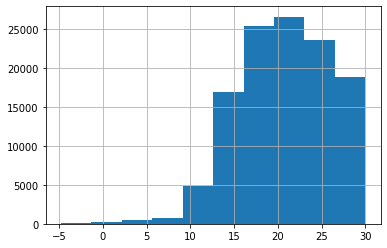

In [9]:
#Now we see that MaxTemp field has few null records
missing_records = len(data[data.MaxTemp.isnull()]) # 1317 out of 495278 records
display(HTML('<h4>Top 5 Frequency of MaxTemp:</h4>'))
print(data.MaxTemp.value_counts()[:9])

display(HTML('<h4>Histogram of MaxTemp Frequency</h4>'))
data['MaxTemp'].hist(bins=10)

In [10]:
mean_accommodate = math.ceil(data.MaxTemp.mean())
mean_MaxTemp = data.loc[(data['MaxTemp'].isnull()), 'MaxTemp']